<a href="https://colab.research.google.com/github/urusy/COVID-19_visualize/blob/main/COVID_19_PositivesAndExam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install japanize-matplotlib

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import japanize_matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

In [4]:
# Google Driveからファイルを読み込み
df_positives = pd.read_csv('/content/drive/MyDrive/data/COVID-19/fukuoka/400009_pref_fukuoka_covid19_newlycases.csv')
df_exam = pd.read_csv('/content/drive/MyDrive/data/COVID-19/fukuoka/400009_pref_fukuoka_covid19_exam.csv')

In [5]:
df_positives['公表年月日'] = pd.to_datetime(df_positives['公表年月日'])
df_positives

,No.,全国地方公共団体コード,都道府県名,公表年月日,曜日,新規陽性数,累計
0,1,400009,福岡県,2020-01-28,火,0,0
1,2,400009,福岡県,2020-01-29,水,0,0
2,3,400009,福岡県,2020-01-30,木,0,0
3,4,400009,福岡県,2020-01-31,金,0,0
4,5,400009,福岡県,2020-02-01,土,0,0
...,...,...,...,...,...,...,...
547,548,400009,福岡県,2021-07-28,水,405,38022
548,549,400009,福岡県,2021-07-29,木,366,38388
549,550,400009,福岡県,2021-07-30,金,478,38866
550,551,400009,福岡県,2021-07-31,土,504,39370


In [6]:
df_exam['年月日'] = pd.to_datetime(df_exam['年月日'])
df_exam

,No.,全国地方公共団体コード,都道府県名,年月日,曜日,福岡市,北九州市,福岡県,民間検査,件数,累計
0,1,400009,福岡県,2020-01-28,火,1.0,NaN,0,0,1,1
1,2,400009,福岡県,2020-01-29,水,NaN,NaN,0,0,0,1
2,3,400009,福岡県,2020-01-30,木,2.0,2.0,0,0,4,5
3,4,400009,福岡県,2020-01-31,金,NaN,NaN,1,0,1,6
4,5,400009,福岡県,2020-02-01,土,1.0,NaN,0,0,1,7
...,...,...,...,...,...,...,...,...,...,...,...
547,548,400009,福岡県,2021-07-28,水,458.0,116.0,411,3995,4980,906061
548,549,400009,福岡県,2021-07-29,木,188.0,18.0,540,4008,4754,910815
549,550,400009,福岡県,2021-07-30,金,382.0,22.0,699,3544,4647,915462
550,551,400009,福岡県,2021-07-31,土,339.0,4.0,1000,2669,4012,919474


In [7]:
start_date = '2021-04-01'
end_date = '2021-07-31'

In [8]:
df_positives = df_positives.set_index('公表年月日')
df_exam = df_exam.set_index('年月日')

In [9]:
# df_positives[start_date:end_date]['新規陽性数'].values
df_exam[start_date:end_date]['件数'].values

array([2024, 2284, 2221, 1082,  969, 2583, 2331, 2684, 2810, 2416, 1346,
       1270, 3470, 3317, 3611, 3058, 2981, 1572, 1945, 4057, 5635, 3971,
       5480, 5147, 3103, 2104, 5537, 5574, 4119, 3328, 5847, 3993, 1987,
       3138, 2468, 3881, 6264, 6111, 3790, 3145, 6915, 7227, 6598, 6333,
       6519, 4911, 3564, 6848, 6578, 6934, 5287, 5177, 3585, 2369, 4894,
       4458, 4681, 4556, 4048, 2200, 1866, 4337, 3860, 3686, 3391, 3640,
       1811, 1384, 4469, 3394, 3492, 3206, 3068, 1559, 1648, 3944, 3267,
       2774, 2395, 2371, 1291, 1175, 3654, 2778, 3135, 2901, 2477, 1213,
       1293, 3008, 3189, 2462, 2540, 2506, 1280, 1120, 3362, 3061, 2686,
       2724, 2524, 1673, 1686, 3830, 3279, 3687, 2645, 3010, 1894, 1148,
       4036, 3668, 2505, 1422, 1865, 2183, 1941, 5439, 4980, 4754, 4647,
       4012])

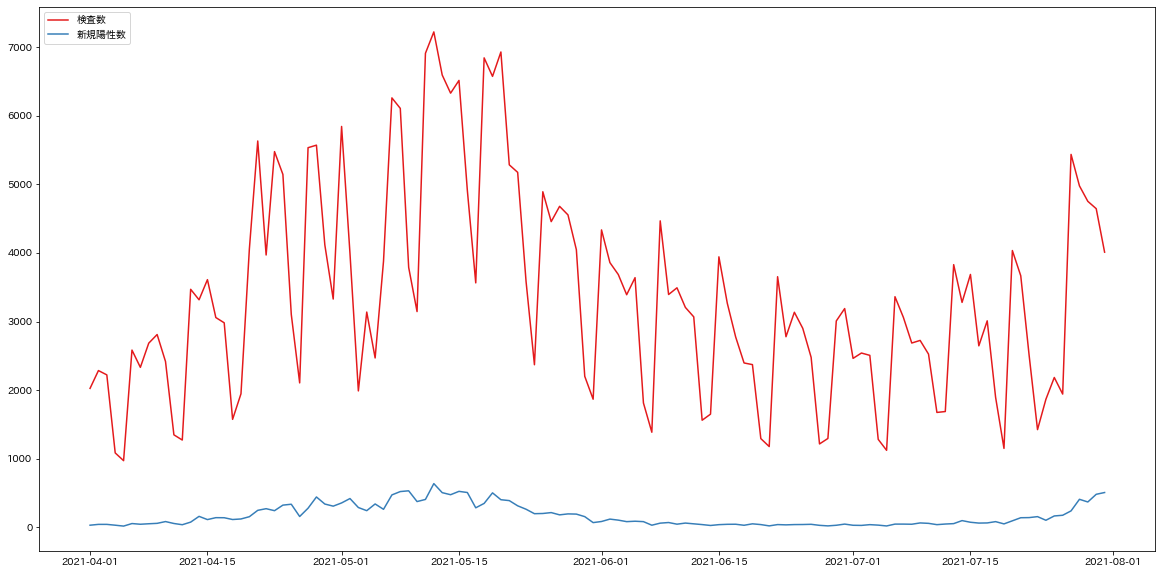

In [10]:
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(111)
# ax1.set_yscale('log')

ax1.plot(df_exam[start_date:end_date].index, df_exam[start_date:end_date]['件数'].values, color = cm.Set1.colors[0])
ax1.plot(df_positives[start_date:end_date].index, df_positives[start_date:end_date]['新規陽性数'].values, color = cm.Set1.colors[1])

ax1.legend(['検査数', '新規陽性数'], loc='upper left')

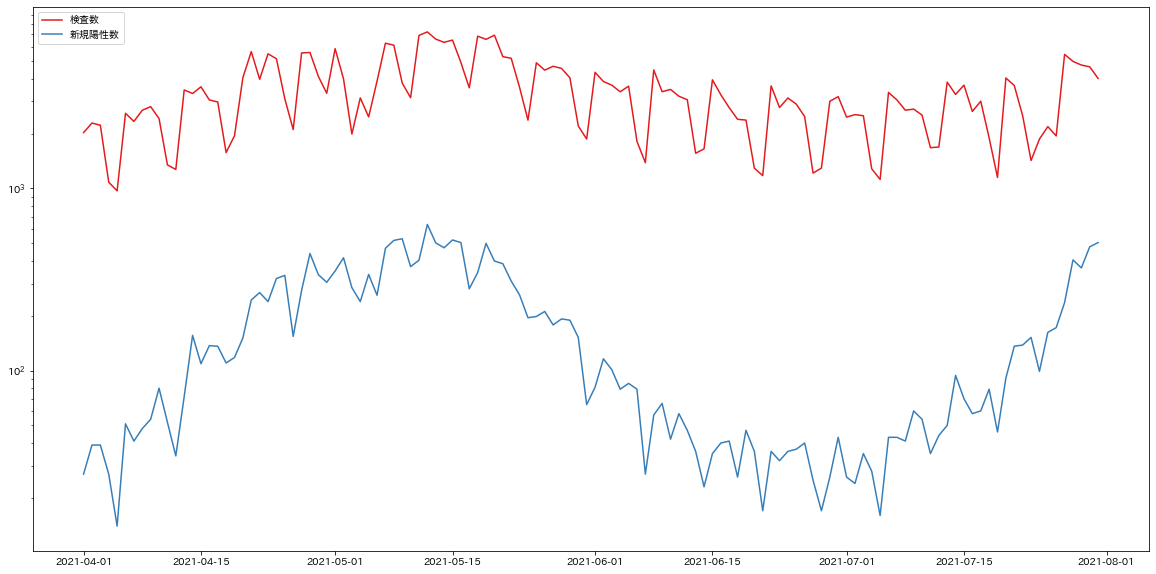

In [11]:
# 対数グラフ
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(111)
ax1.set_yscale('log')

ax1.plot(df_exam[start_date:end_date].index, df_exam[start_date:end_date]['件数'].values, color = cm.Set1.colors[0])
ax1.plot(df_positives[start_date:end_date].index, df_positives[start_date:end_date]['新規陽性数'].values, color = cm.Set1.colors[1])

ax1.legend(['検査数', '新規陽性数'], loc='upper left')

In [12]:
df_merged = pd.merge(df_positives.reset_index(), df_exam.reset_index(), left_on='公表年月日', right_on='年月日', how='inner').loc[:, ['公表年月日', '曜日_x', '新規陽性数', '件数']].rename(columns={'曜日_x': '曜日'})
df_merged = df_merged.set_index('公表年月日')
df_merged

,曜日,新規陽性数,件数
公表年月日,,,
2020-01-28,火,0,1
2020-01-29,水,0,0
2020-01-30,木,0,4
2020-01-31,金,0,1
2020-02-01,土,0,1
...,...,...,...
2021-07-28,水,405,4980
2021-07-29,木,366,4754
2021-07-30,金,478,4647


In [13]:
df_merged['陽性率'] = 0

In [14]:
def rate(x):
  # return x.loc[:, '新規陽性数'] / x.loc[:, '件数']

  if x.iloc[2] == 0:
    return 0

  return x.iloc[1] / x.iloc[2] * 100

In [15]:
df_merged['陽性率'] = df_merged.apply(rate, axis=1)
df_merged

,曜日,新規陽性数,件数,陽性率
公表年月日,,,,
2020-01-28,火,0,1,0.000000
2020-01-29,水,0,0,0.000000
2020-01-30,木,0,4,0.000000
2020-01-31,金,0,1,0.000000
2020-02-01,土,0,1,0.000000
...,...,...,...,...
2021-07-28,水,405,4980,8.132530
2021-07-29,木,366,4754,7.698780
2021-07-30,金,478,4647,10.286206


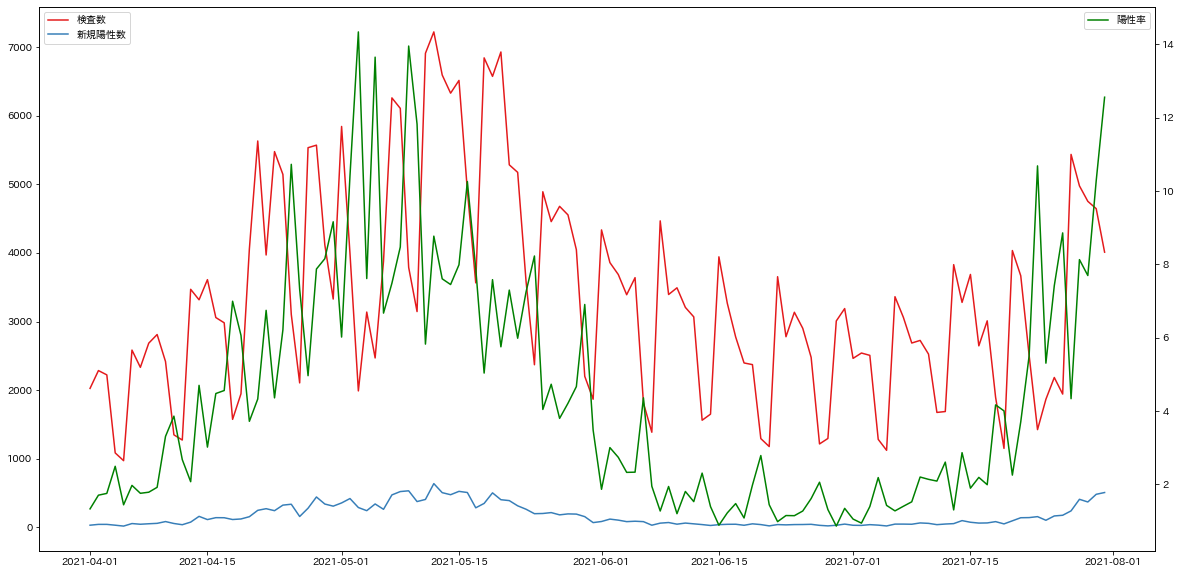

In [16]:
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(111)
# ax1.set_yscale('log')

ax2 = ax1.twinx()

ax1.plot(df_exam[start_date:end_date].index, df_exam[start_date:end_date]['件数'].values, color = cm.Set1.colors[0])
ax1.plot(df_positives[start_date:end_date].index, df_positives[start_date:end_date]['新規陽性数'].values, color = cm.Set1.colors[1])

ax2.plot(df_merged[start_date:end_date].index, df_merged[start_date:end_date]['陽性率'].values, color = 'green')

ax1.legend(['検査数', '新規陽性数'], loc='upper left')
ax2.legend(['陽性率'])

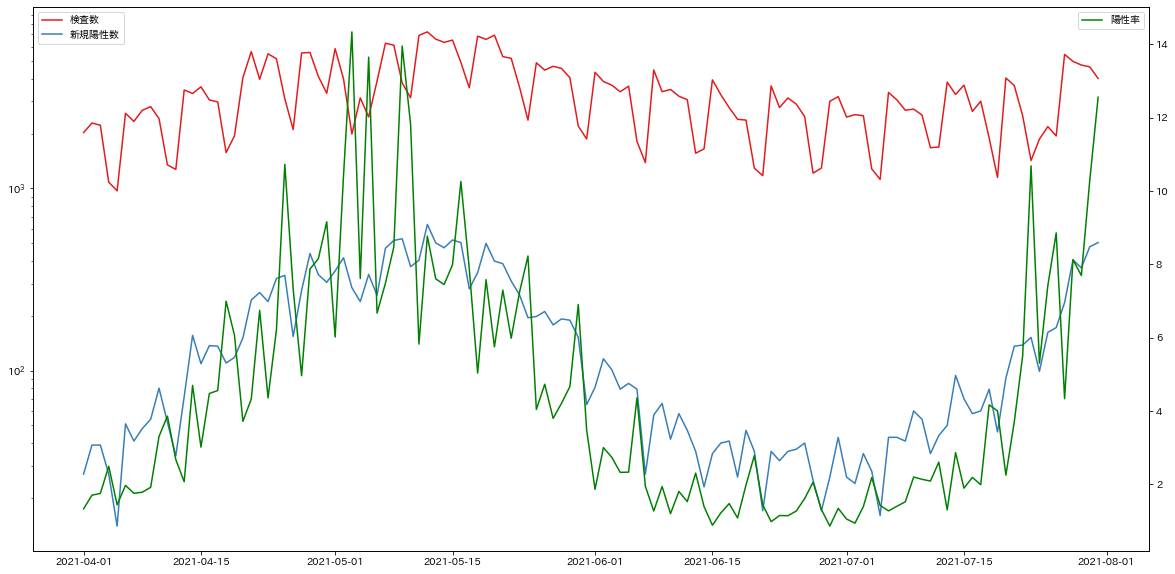

In [17]:
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(111)
ax1.set_yscale('log')

ax2 = ax1.twinx()

ax1.plot(df_exam[start_date:end_date].index, df_exam[start_date:end_date]['件数'].values, color = cm.Set1.colors[0])
ax1.plot(df_positives[start_date:end_date].index, df_positives[start_date:end_date]['新規陽性数'].values, color = cm.Set1.colors[1])

ax2.plot(df_merged[start_date:end_date].index, df_merged[start_date:end_date]['陽性率'].values, color = 'green')

ax1.legend(['検査数', '新規陽性数'], loc='upper left')
ax2.legend(['陽性率'])